In [1]:
# 3.1.4

import cv2 as cv
import sys

img = cv.imread('soccer.jpg')

if img is None:
    sys.exit('파일을 찾을 수 없습니다.')
    
cv.imshow('Original_RGB', img)
cv.imshow('Upper left half', img[0:img.shape[0]//2,0:img.shape[1]//2,:])
cv.imshow('Center half', img[img.shape[0]//4:3*img.shape[0]//4,img.shape[1]//4:3*img.shape[1]//4,:])

cv.imshow('R channel', img[:,:,2])
cv.imshow('G channel', img[:,:,1])
cv.imshow('B channel', img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

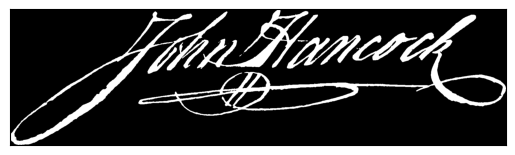

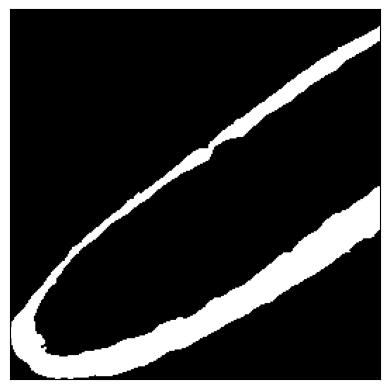

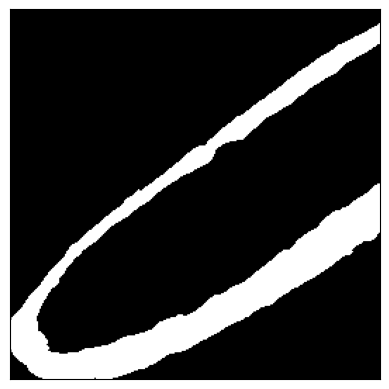

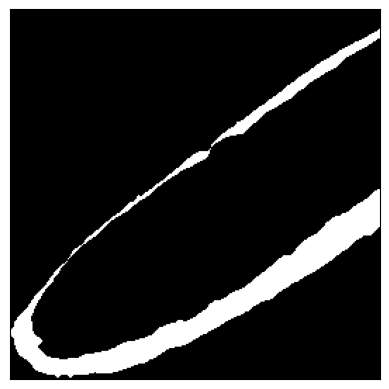

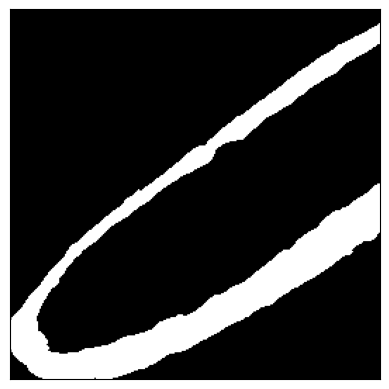

In [8]:
# 3.2.4

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('JohnHancocksSignature.png', cv.IMREAD_UNCHANGED)

t,bin_img = cv.threshold(img[:,:,3], 0, 225, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(bin_img, cmap ='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b = bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

se = np.uint8([[0,0,1,0,0],
              [0,1,1,1,0],
              [1,1,1,1,1],
              [0,1,1,1,0],
              [0,0,1,0,0]])

b_dilation = cv.dilate(b, se, iterations=1)
plt.imshow(b_dilation, cmap ='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion = cv.erode(b, se, iterations=1)
plt.imshow(b_erosion, cmap ='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_closing = cv.erode(cv.dilate(b, se, iterations=1), se, iterations=1)
plt.imshow(b_dilation, cmap ='gray'), plt.xticks([]), plt.yticks([])
plt.show()

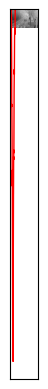

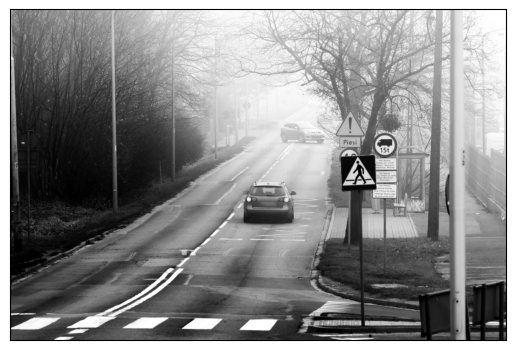

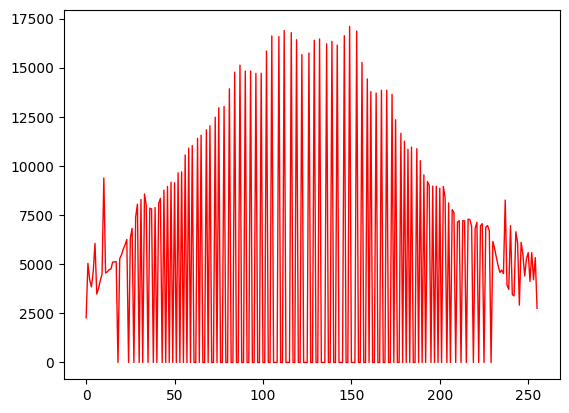

([<matplotlib.lines.Line2D at 0x26162b52f10>], None)

In [11]:
# 3.2.2

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('mistyroad.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap ='gray'), plt.xticks([]), plt.yticks([])

h = cv.calcHist([gray],[0],None,[256],[0,256])
plt.plot(h, color='r', linewidth=1), plt.show()

equal = cv.equalizeHist(gray)
plt.imshow(equal, cmap ='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h = cv.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h, color='r', linewidth=1), plt.show()

In [12]:
# 4.1.2

import cv2 as cv

img = cv.imread('soccer.jpg')
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray_x = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize = 3)
gray_y = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize = 3)

sobel_x = cv.convertScaleAbs(gray_x) 
sobel_y = cv.convertScaleAbs(gray_y) 

edge_strength = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

cv.imshow('Original', gray)
cv.imshow('sobelx', sobel_x)
cv.imshow('sobely', sobel_y)
cv.imshow('edge strength', edge_strength)

cv.waitKey()
cv.destroyAllWindows()

In [16]:
# 4.3.2

import cv2 as cv

img = cv.imread('apples.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

apples = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 200, param1 = 150, 
                        param2 = 20, minRadius = 50, maxRadius = 120)

for i in apples[0]:
    cv.circle(img, (int(i[0]), int(i[1])), int(i[0]), (255,0,0), 2)
    
cv.imshow('Apple detection', img)

cv.waitKey()
cv.destroyAllWindows()

In [3]:
# 4.4.3

import skimage
import numpy as np
import cv2
import time

coffee = skimage.data.coffee()

start = time.time()
slic = skimage.segmentation.slic(coffee, compactness=20, n_segments=600, start_label=1)
g = skimage.graph.rag_mean_color(coffee, slic, mode="similarity")
ncut = skimage.graph.cut_normalized(slic, g)  # 정규화 절단
print(coffee.shape, " Coffee 영상을 분할하는데 ", time.time() - start, "초 소요")

marking = skimage.segmentation.mark_boundaries(coffee, ncut)
ncut_coffee = np.uint8(marking * 255.0)

cv2.imshow("Normalized cut", cv2.cvtColor(ncut_coffee, cv2.COLOR_RGB2BGR))

cv2.waitKey()
cv2.destroyAllWindows()

(400, 600, 3)  Coffee 영상을 분할하는데  14.510411739349365 초 소요


In [40]:
# 5.4 shift

import cv2

img = cv2.imread("mot_color70.jpg")  # 영상 읽기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

gray = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("sift", gray)

k = cv2.waitKey()
cv2.destroyAllWindows()

In [43]:
sys.version

'3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]'